# Dijkstras algorithm

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

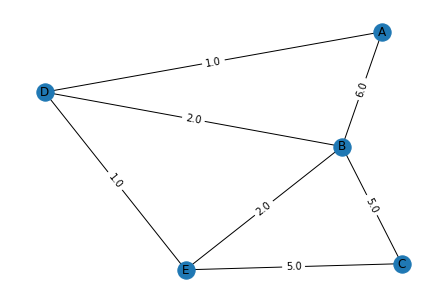

In [4]:
# contruct a graph
G = nx.Graph()
G.add_edge('A', 'B', weight = 6.)
G.add_edge('A', 'D', weight = 1.)
G.add_edge('B', 'D', weight = 2.)
G.add_edge('B', 'C', weight = 5.)
G.add_edge('B', 'E', weight = 2.)
G.add_edge('C', 'E', weight = 5.)
G.add_edge('D', 'E', weight = 1.)

# show graph
pos = nx.spring_layout(G) #, k=10
nx.draw(G, pos, with_labels=True)
labels = {e: G.edges[e]['weight'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [135]:
# Dijkstra algorithm

# first no visitied nodes
visited_nodes = []

# all nodes from the graph
unvisited_nodes = list(G.nodes)

# set starting node
starting_node = ['A'] # set by user when making it into a function

# initialize the distance dictionary with 0 for the starting node and inf for the others
distance = {'A': 0, 'B': np.inf, 'C': np.inf, 'D': np.inf, 'E': np.inf}

# calculate the length of while loop by calcualating the number of unvisited nodes
length = len(unvisited_nodes)

# initialize the current node with the starting node
current_node = ''.join(starting_node)
# initialze the visited nodes with the starting node == current node
visited_nodes.append(current_node)
# initialize the unvisited nodes by removing the starting node == current node == visited node
unvisited_nodes.remove(current_node)

#while length >= 0:
while len(unvisited_nodes) > 0:
    # remove current node from the distance dictionary, because it has the shortest distance to itself
    distance.pop(current_node)
    
    # find adjacent nodes to the current node
    adj_nodes = G.adj[current_node]
    
    # only for the unvisited adjacent nodes: update distance dictionary if the distance is shorter
    for node in adj_nodes.keys():
        if node in unvisited_nodes:
            if adj_nodes[node]['weight'] < distance[node]:
                distance[node] = adj_nodes[node]['weight']
    print('updated distance dict:', distance)
    
       
    # pick 
    current_node = min(distance, key = distance.get)
    print('new current node:', current_node)
    
    # add new current node to the visited nodes
    visited_nodes.append(current_node)
    print('visited nodes:', visited_nodes)
    # remove it from the unvisited
    unvisited_nodes.remove(current_node)
    print('unvisited nodes:', unvisited_nodes)
    print('end of loop')
    #length = length - 1

updated distance dict: {'B': 6.0, 'C': inf, 'D': 1.0, 'E': inf}
new current node: D
visited nodes: ['A', 'D']
unvisited nodes: ['B', 'C', 'E']
end of loop
updated distance dict: {'B': 2.0, 'C': inf, 'E': 1.0}
new current node: E
visited nodes: ['A', 'D', 'E']
unvisited nodes: ['B', 'C']
end of loop
updated distance dict: {'B': 2.0, 'C': 5.0}
new current node: B
visited nodes: ['A', 'D', 'E', 'B']
unvisited nodes: ['C']
end of loop
updated distance dict: {'C': 5.0}
new current node: C
visited nodes: ['A', 'D', 'E', 'B', 'C']
unvisited nodes: []
end of loop


In [15]:
def Dijkstra_shortest_path(Graph, starting_node):
    """
    The Dijkstras shortest path algorithm calculates the shortest path (every node is visited only once
    and each edge is used only one) through a graph with visiting all nodes given. (Problems arising 
    by this path not exisiting for a graph are not handeled)
    
    :param
    ---------
    Graph: a graph of any size for which the shortest path shall be evaluated (graph object)
    starting_node: user defines the starting node (str)
    
    :returns
    ---------
    visited_nodes: List with nodes in order of the path
    """
    
    # first no visitied nodes
    visited_nodes = []

    # all nodes from the graph
    unvisited_nodes = list(Graph.nodes)

    # set starting node
    starting_node = starting_node

    # initialize the distance dictionary with 0 for the starting node and inf for the others
    distance = {}
    for node in list(Graph.nodes):
        distance.update({node: np.inf})
    distance[starting_node] = 0

    # calculate the length of while loop by calcualating the number of unvisited nodes
    length = len(unvisited_nodes)

    # initialize the current node with the starting node
    current_node = starting_node
    # initialze the visited nodes with the starting node == current node
    visited_nodes.append(current_node)
    # initialize the unvisited nodes by removing the starting node == current node == visited node
    unvisited_nodes.remove(current_node)
    
    while len(unvisited_nodes) > 0:
        # remove current node from the distance dictionary, because it has the shortest distance to itself
        distance.pop(current_node)

        # find adjacent nodes to the current node
        adj_nodes = G.adj[current_node]

        # only for the unvisited adjacent nodes: update distance dictionary if the distance is shorter
        for node in adj_nodes.keys():
            if node in unvisited_nodes:
                if adj_nodes[node]['weight'] < distance[node]:
                    distance[node] = adj_nodes[node]['weight']
        #print('updated distance dict:', distance)


        # pick the new current node by finding the edge with the shortest distance
        current_node = min(distance, key = distance.get)
        #print('new current node:', current_node)

        # add new current node to the visited nodes
        visited_nodes.append(current_node)
        #print('visited nodes:', visited_nodes)
        
        # remove it from the unvisited
        unvisited_nodes.remove(current_node)
        #print('unvisited nodes:', unvisited_nodes)
    
    path = visited_nodes
    
    return path
    

In [16]:
Dijkstra_shortest_path(Graph = G, starting_node = 'A')

['A', 'D', 'E', 'B', 'C']